# Evaluation

This notebook discusses evaluation methods using the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Evaluation methods](#methods)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from academia_tag_recommender.definitions import MODELS_PATH

<a id='data_import'/>

## Data import

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from academia_tag_recommender.preprocessor import BasicPreprocessor
from academia_tag_recommender.tokenizer import BasicTokenizer, EnglishStemmer, PorterStemmer, LancasterStemmer, Lemmatizer
from academia_tag_recommender.test_train_data import get_test_train_data

X_train, X_test, y_train, y_test = get_test_train_data(TfidfVectorizer, BasicTokenizer, BasicPreprocessor, None, (1, 1), 0.25, multi=True)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Received saved model


In [3]:
from academia_tag_recommender.classifier_computation import load_model

models = ['Multioutput - Complement Naive Bayes',
          'Multioutput - Gaussian Naive Bayes',
          'Multioutput - Multinomial Naive Bayes',
          'Multioutput - Linear SVC',
          'Multioutput - Logistic Regression',]

clfs = [[name, load_model(name).predict(X_test)] for name in models]

<a id='methods'/>

## [Evaluation methods](https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics)

Evaluation Measures from Madjarov et al. 2012:

**Example-based**
> The example-based evaluation measures are based on the average differences of the actual and the predicted sets of labels over all examples of the evaluation dataset. (Madjaroj et al. 2012)
- [Hamming loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss)
> The Hamming loss is the fraction of labels that are incorrectly predicted.
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
> In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
- [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)  with `average: 'samples'`
> The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)  with `average: 'samples'`
> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)  with `average: 'samples'`
> The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
>*F1 = 2 * (precision * recall) / (precision + recall)*
- subset accuracy

**Label-based**
> The label-based evaluation measures [...] assess the predictive performance for each label separately and then average the performance over all labels. (Madjaroj et al. 2012)
- micro-precision [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) with `average: 'micro'`
- micro-recall [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) with `average: 'micro'`
- micro-F1 [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) with `average: 'micro'`
- macro-precision [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) with `average: 'macro'`
- macro-recall [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) with `average: 'macro'`
- macro-F1 [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) with `average: 'macro'`


In [4]:
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score

In [8]:
metrics = []
for clf in clfs:
    name, y_pred = clf[:2]
    if name != 'Multioutput - Elastic Net':
        clf_metrics = [name,
                       y_pred,

                       hamming_loss(y_test, y_pred),
                       accuracy_score(y_test, y_pred),
                       precision_score(y_test, y_pred, average='samples'),
                       recall_score(y_test, y_pred, average='samples'),
                       f1_score(y_test, y_pred, average='samples'),

                       precision_score(y_test, y_pred, average='micro'),
                       recall_score(y_test, y_pred, average='micro'),
                       f1_score(y_test, y_pred, average='micro'),

                       precision_score(y_test, y_pred, average='macro'),
                       recall_score(y_test, y_pred, average='macro'),
                       f1_score(y_test, y_pred, average='macro')]
        metrics.append(clf_metrics)

Multioutput - Complement Naive Bayes
Multioutput - Gaussian Naive Bayes
Multioutput - Multinomial Naive Bayes
Multioutput - Elastic Net
Multioutput - Linear SVC
Multioutput - Logistic Regression


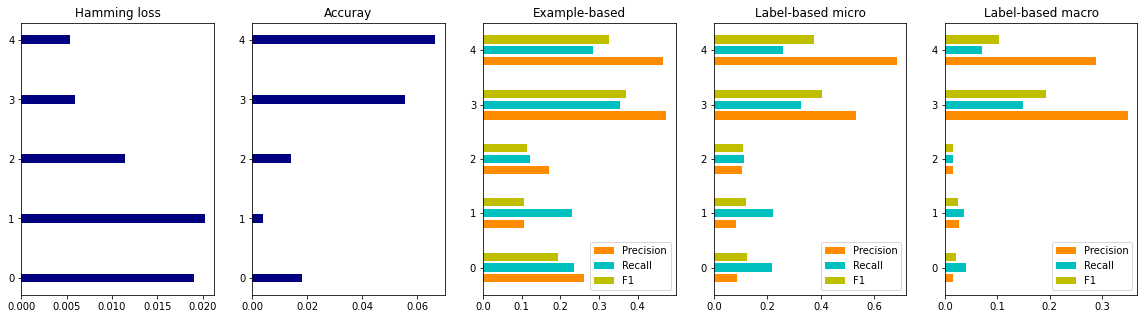

In [45]:
results = [[x[i] for x in metrics] for i in range(len(metrics[0]))]

clf_names, _, hamming_loss_sample, accuray_sample, precision_sample, recall_sample, f1_sample, precision_micro, recall_micro, f1_micro, precision_macro, recall_macro, f1_macro = results
indices = np.arange(len(clf_names))

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].set_title('Hamming loss')
axes[0].barh(indices, hamming_loss_sample, .15, color='navy')

axes[1].set_title('Accuray')
axes[1].barh(indices, accuray_sample, .15, color='navy')

axes[2].set_title('Example-based')
axes[2].barh(indices + -.2, precision_sample, .15, label="Precision", color='darkorange')
axes[2].barh(indices + 0, recall_sample, .15, label="Recall", color='c')
axes[2].barh(indices + .2, f1_sample, .15, label="F1", color='y')
axes[2].legend(loc='best')

axes[3].set_title('Label-based micro')
axes[3].barh(indices + -.2, precision_micro, .15, label="Precision", color='darkorange')
axes[3].barh(indices + 0, recall_micro, .15, label="Recall", color='c')
axes[3].barh(indices + .2, f1_micro, .15, label="F1", color='y')
axes[3].legend(loc='best')

axes[4].set_title('Label-based macro')
axes[4].barh(indices + -.2, precision_macro, .15, label="Precision", color='darkorange')
axes[4].barh(indices + 0, recall_macro, .15, label="Recall", color='c')
axes[4].barh(indices + .2, f1_macro, .15, label="F1", color='y')
axes[4].legend(loc='best')

#for i, c in zip(indices, clf_names):
#    axes[0].text(-.3, i + .3, c)
plt.show()

In [59]:
print('{:<30}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}'.format('', 'HL', 'Acc', 'Prec s', 'Rec s', 'F1 s', 'Prec mi', 'Rec mi', 'F1 mi', 'Prec ma', 'Rec ma', 'F1 ma'))
for clf in metrics:
        name, _, hamming_loss_sample, accuray_sample, precision_sample, recall_sample, f1_sample, precision_micro, recall_micro, f1_micro, precision_macro, recall_macro, f1_macro = clf
        print('{:<30}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format(name[14:], hamming_loss_sample, accuray_sample, precision_sample, recall_sample, f1_sample, precision_micro, recall_micro, f1_micro, precision_macro, recall_macro, f1_macro))

                              HL        Acc       Prec s    Rec s     F1 s      Prec mi   Rec mi    F1 mi     Prec ma   Rec ma    F1 ma     
Complement Naive Bayes        0.019     0.018     0.260     0.235     0.194     0.086     0.215     0.123     0.016     0.041     0.022     
Gaussian Naive Bayes          0.020     0.004     0.105     0.231     0.106     0.081     0.219     0.119     0.026     0.037     0.024     
Multinomial Naive Bayes       0.011     0.014     0.171     0.121     0.115     0.103     0.111     0.107     0.015     0.015     0.015     
Linear SVC                    0.006     0.055     0.475     0.354     0.370     0.532     0.325     0.404     0.350     0.150     0.193     
Logistic Regression           0.005     0.067     0.466     0.285     0.326     0.686     0.256     0.373     0.288     0.071     0.103     


*Logistic Regression* gives the best results in *Hamming loss*, *Accuracy* and *micro precision*, while *Linear SVC* give the best results for *example based Precision, Recall and F1*, *micro Recal and F1*, as well as *macro Precision, Recall and F1*.

Eigener Classifier (Jedes Label verwendet unterschiedliche Testdaten)

In [61]:
print('{:<30}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format('own', -1, -1, -1, -1, -1, 0.2080958431657288, 0.3148931494808548, 0.25059018973507036, 0.14524136008560942, 0.48429116756932744, 0.13915965154435045))          

own                           -1.000    -1.000    -1.000    -1.000    -1.000    0.208     0.315     0.251     0.145     0.484     0.139     


Eigener Classifier (nur 190 involvierte Label)

In [63]:
print('{:<30}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format('own', 0.006, 0.320, 0.718, 0.729, 0.693, 0.771, 0.758, 0.765, 0.268, 0.268, 0.261))          

own                           0.006     0.320     0.718     0.729     0.693     0.771     0.758     0.765     0.268     0.268     0.261     


Eigener Classifier (nicht involvierte werden immer als 0 ausgegeben)

In [64]:
print('{:<30}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format('own', 0.004, 0.200, 0.690, 0.781, 0.702, 0.673, 0.763, 0.715, 0.129, 0.139, 0.131))          

own                           0.004     0.200     0.690     0.781     0.702     0.673     0.763     0.715     0.129     0.139     0.131     
